In [1]:
# An example of ClassificationThesholdTuner with real classifiers on a real datasets
# The classifiers are not tuned here, and we may find different ideal threholds with
# well-tuned models. 

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from threshold_tuner import ClassificationThresholdTuner

# Breast Cancer

In [3]:
# This is a binary classification dataset.

from sklearn.datasets import load_breast_cancer

np.random.seed(0)

data = load_breast_cancer()
df = pd.DataFrame(data.data)
df.columns = data.feature_names
y_true = data.target
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [4]:
target_classes = pd.Series(y_true).unique()
target_classes

array([0, 1])

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df, y_true, test_size=0.33, random_state=42)

In [6]:
clf = RandomForestClassifier(max_depth=1, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [7]:
tuner = ClassificationThresholdTuner()

,Metric,0,1,Macro
0,Precision,0.983607,0.944882,0.964244
0,Recall,0.895522,0.991736,0.943629
0,F1,0.937500,0.967742,0.952621


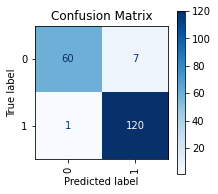

,Metric,Score
0,Brier Score,0.048751
1,AUROC,0.992846


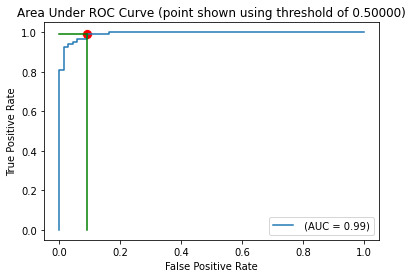

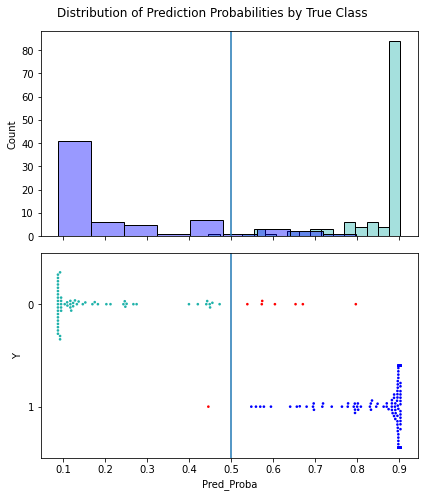

In [8]:
# We first look at the metrics using the default threshold of 0.5.

tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    default_class=None,
    thresholds=None
)  

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:00<00:00,  9.42it/s]


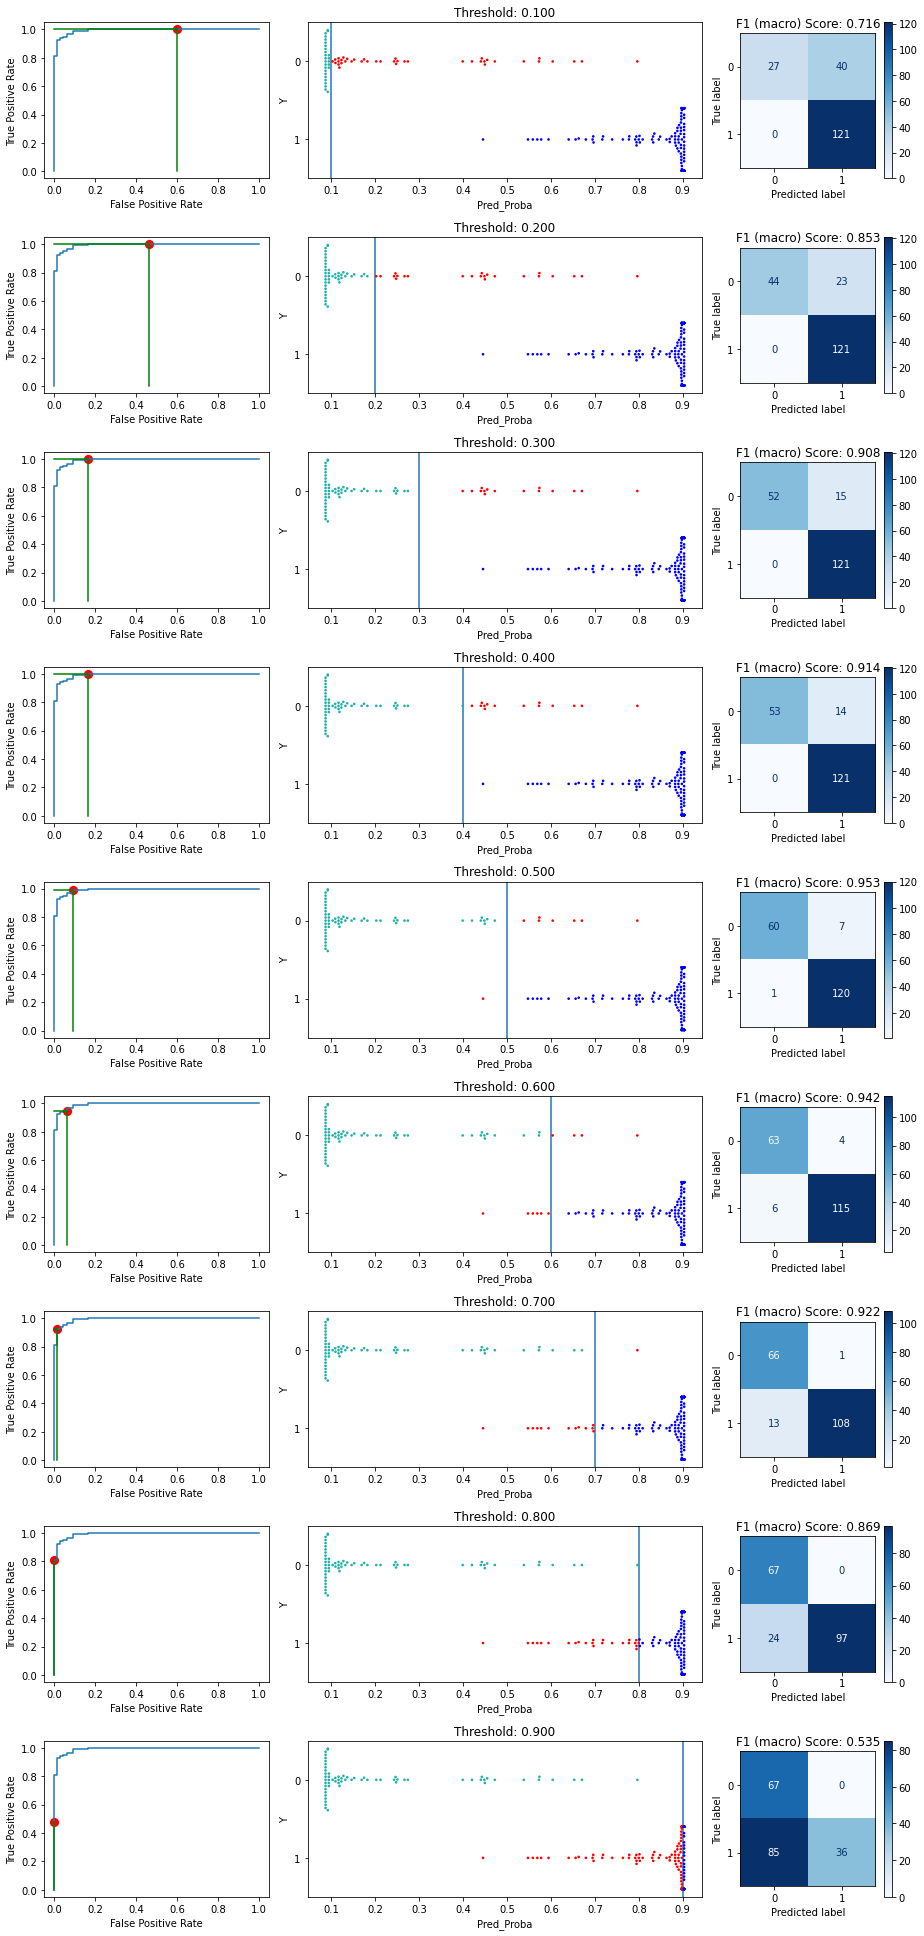

In [9]:
tuner.plot_by_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba)

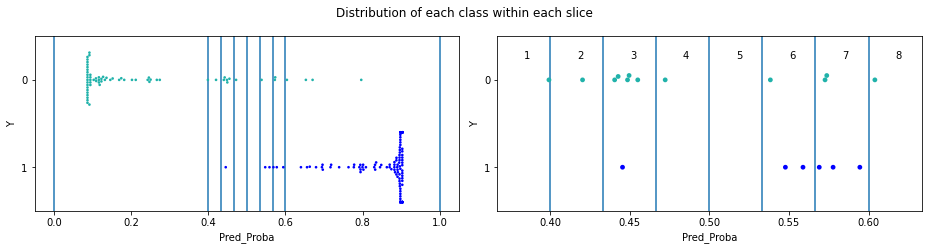

,Slice,Min Prob,Max Prob,1,0,Total,Fraction 1,Fraction 0
0,1,0.000000,0.400000,0,53,53,0.000000,1.000000
1,2,0.400000,0.433333,0,1,1,0.000000,1.000000
2,3,0.433333,0.466667,1,5,6,0.166667,0.833333
3,4,0.466667,0.500000,0,1,1,0.000000,1.000000
4,5,0.500000,0.533333,0,0,0,NaN,NaN
5,6,0.533333,0.566667,2,1,3,0.666667,0.333333
6,7,0.566667,0.600000,3,2,5,0.600000,0.400000
7,8,0.600000,1.000000,115,4,119,0.966387,0.033613


In [10]:
tuner.describe_slices(    
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    start=0.4, end=0.6, num_slices=6)

In [11]:
from sklearn.metrics import f1_score

best_threshold = tuner.tune_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    metric=f1_score,
    average='macro',
    higher_is_better=True,
    max_iterations=5
)
best_threshold

 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:00<00:00, 50.00it/s]


0.5465

In [12]:
tuned_pred = tuner.get_predictions(target_classes, y_pred_proba, None, best_threshold)

# Display the first 10 predictions
tuned_pred[:10]

['1', '0', '0', '1', '1', '0', '0', '0', '1', '1']

,Metric,0,1,Macro
0,Precision,0.983871,0.952381,0.968126
0,Recall,0.910448,0.991736,0.951092
0,F1,0.945736,0.971660,0.958698


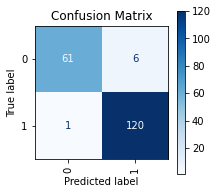

,Metric,Score
0,Brier Score,0.048751
1,AUROC,0.992846


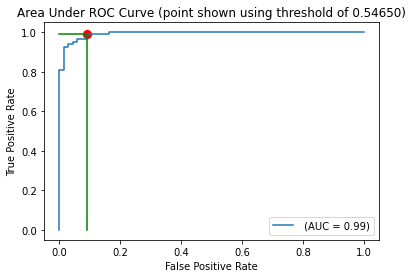

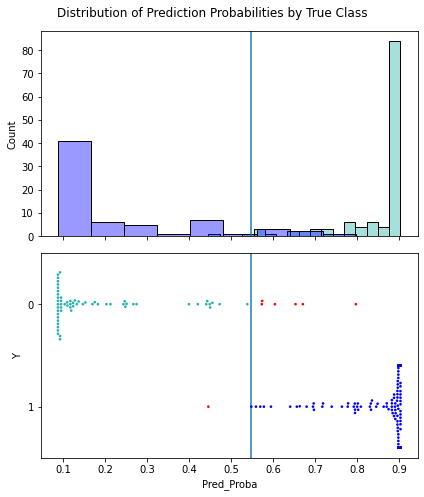

In [13]:
# The F1 macro score using the the best_threshold improved from 
# 0.928 to 0.953

tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    thresholds=best_threshold
)  

# Steel Plates Fault

In [14]:
from sklearn.datasets import fetch_openml

In [15]:
np.random.seed(0)

data = fetch_openml("steel-plates-fault", version=1, parser='auto') 
df = pd.DataFrame(data['data'])
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33
0,42,50,270900,270944,267,17,44,24220,76,108,...,1.6435,0.8182,-0.2913,0.5822,1,0,0,0,0,0
1,645,651,2538079,2538108,108,10,30,11397,84,123,...,1.4624,0.7931,-0.1756,0.2984,1,0,0,0,0,0
2,829,835,1553913,1553931,71,8,19,7972,99,125,...,1.2553,0.6667,-0.1228,0.2150,1,0,0,0,0,0
3,853,860,369370,369415,176,13,45,18996,99,126,...,1.6532,0.8444,-0.1568,0.5212,1,0,0,0,0,0
4,1289,1306,498078,498335,2409,60,260,246930,37,126,...,2.4099,0.9338,-0.1992,1.0000,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936,249,277,325780,325796,273,54,22,35033,119,141,...,1.2041,-0.4286,0.0026,0.7254,0,0,0,0,0,0
1937,144,175,340581,340598,287,44,24,34599,112,133,...,1.2305,-0.4516,-0.0582,0.8173,0,0,0,0,0,0
1938,145,174,386779,386794,292,40,22,37572,120,140,...,1.1761,-0.4828,0.0052,0.7079,0,0,0,0,0,0
1939,137,170,422497,422528,419,97,47,52715,117,140,...,1.4914,-0.0606,-0.0171,0.9919,0,0,0,0,0,0


In [16]:
target_classes = ['1', '2']

In [17]:
y_true = data['target']
y_true.value_counts()

1    1268
2     673
Name: Class, dtype: int64

In [19]:
X_train, X_test, y_train, y_test = train_test_split(df, y_true, test_size=0.33, random_state=42)

clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

tuner = ClassificationThresholdTuner()

,Metric,1,2,Macro
0,Precision,0.814286,0.973510,0.893898
0,Recall,0.990074,0.617647,0.803861
0,F1,0.893617,0.755784,0.824701


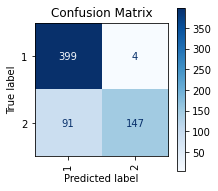

,Metric,Score
0,Brier Score,0.136633
1,AUROC,0.983245


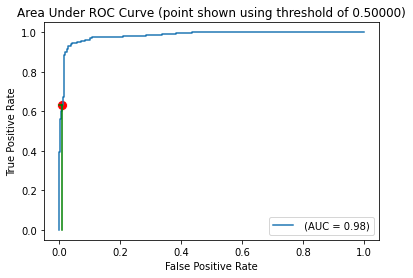

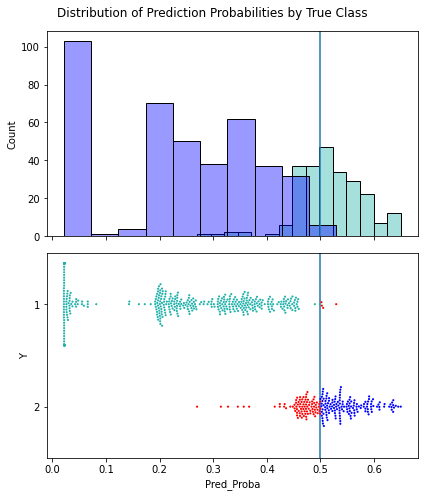

In [20]:
# We first look at the metrics using the default threshold of 0.5.

tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    default_class=None,
    thresholds=None
)  

,Start Range %,End Range %,Min Probability,Max Probability,Count 1,Count 2,Total Count,Precision,Recall,Cumulative Count 2,Cumulative Total Count,Cumulative Precision,Cumulative Recall
0,0.9,1.0,0.552825,0.645044,0,64,64,1.000000,0.268908,64,64,1.000000,0.268908
1,0.8,0.9,0.509194,0.551226,1,63,64,0.984375,0.264706,127,128,0.992188,0.533613
2,0.7,0.8,0.473152,0.508731,5,59,64,0.921875,0.247899,186,192,0.968750,0.781513
3,0.6,0.7,0.434981,0.473030,24,40,64,0.625000,0.168067,226,256,0.882812,0.949580
4,0.5,0.6,0.364732,0.434753,58,6,64,0.093750,0.025210,232,320,0.725000,0.974790
5,0.4,0.5,0.319510,0.364285,61,3,64,0.046875,0.012605,235,384,0.611979,0.987395
6,0.3,0.4,0.234321,0.317514,62,2,64,0.031250,0.008403,237,448,0.529018,0.995798
7,0.2,0.3,0.199175,0.233330,64,0,64,0.000000,0.000000,237,512,0.462891,0.995798
8,0.1,0.2,0.026403,0.198962,61,0,61,0.000000,0.000000,237,573,0.413613,0.995798
9,0.0,0.1,0.021737,0.023730,67,0,67,0.000000,0.000000,237,640,0.370312,0.995798


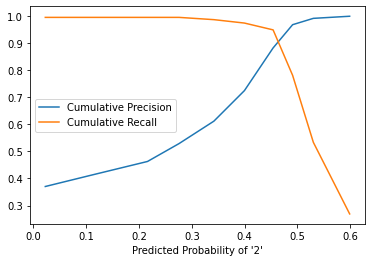

In [21]:
tuner.print_stats_table(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba
)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:01<00:00,  6.56it/s]


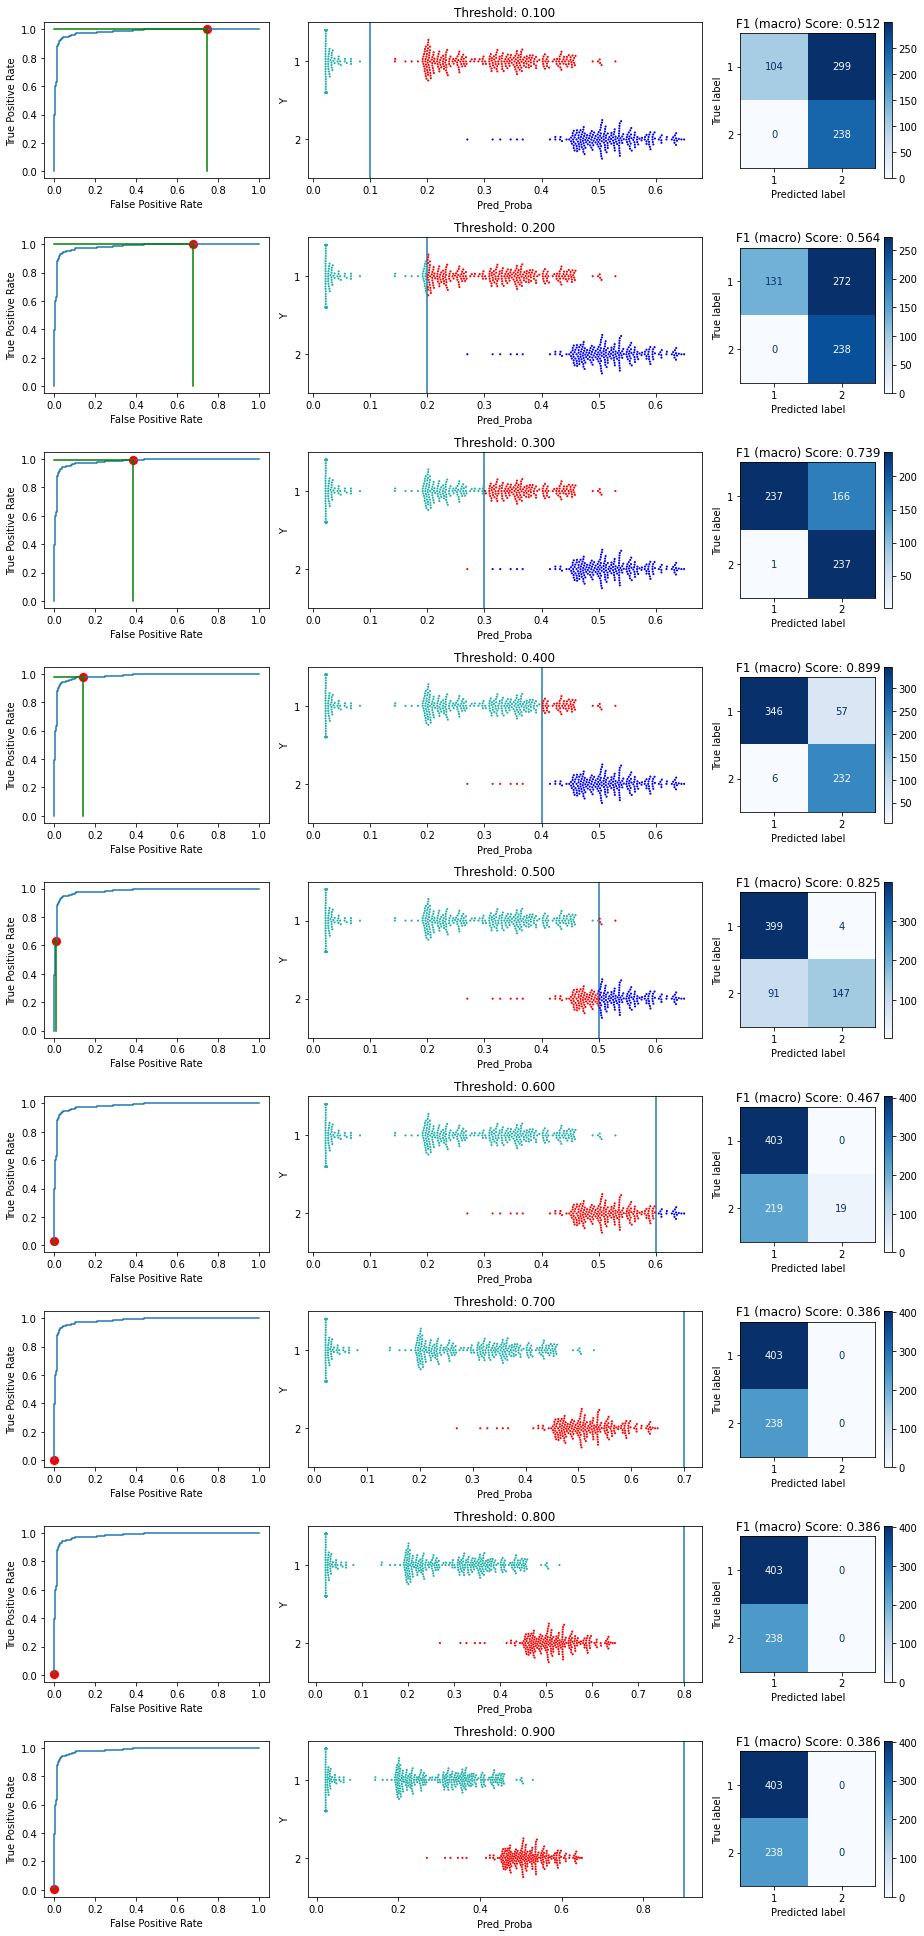

In [22]:
tuner.plot_by_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba)

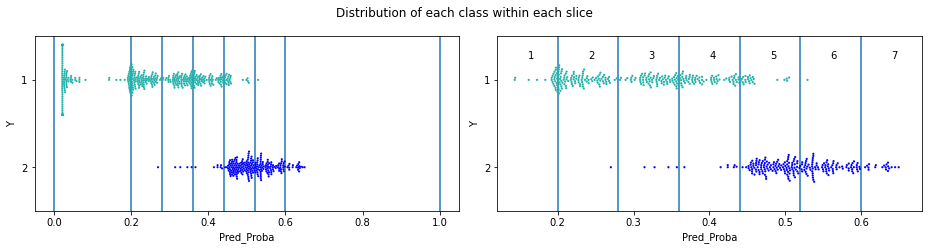

,Slice,Min Prob,Max Prob,2,1,Total,Fraction 2,Fraction 1
0,1,0.00,0.20,0,131,131,0.000000,1.000000
1,2,0.20,0.28,1,98,99,0.010101,0.989899
2,3,0.28,0.36,4,79,83,0.048193,0.951807
3,4,0.36,0.44,7,70,77,0.090909,0.909091
4,5,0.44,0.52,118,24,142,0.830986,0.169014
5,6,0.52,0.60,89,1,90,0.988889,0.011111
6,7,0.60,1.00,19,0,19,1.000000,0.000000


In [23]:
tuner.describe_slices(    
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    start=0.2, end=0.6, num_slices=5)

In [24]:
from sklearn.metrics import f1_score

best_threshold = tuner.tune_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    metric=f1_score,
    average='macro',
    higher_is_better=True,
    max_iterations=5
)
best_threshold

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:00<00:00, 32.54it/s]


0.45145000000000013

,Metric,1,2,Macro
0,Precision,0.965174,0.937238,0.951206
0,Recall,0.962779,0.941176,0.951978
0,F1,0.963975,0.939203,0.951589


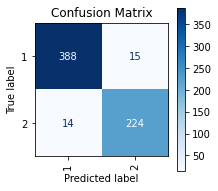

,Metric,Score
0,Brier Score,0.136633
1,AUROC,0.983245


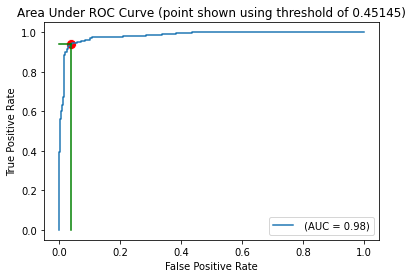

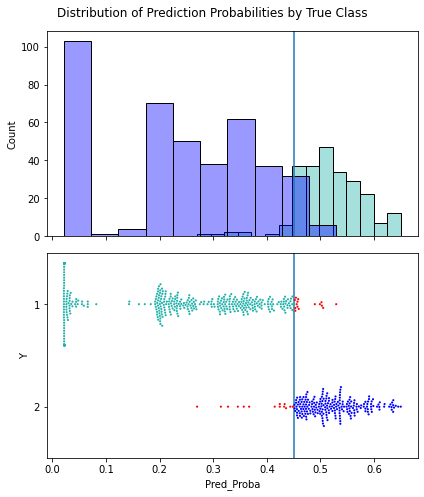

In [25]:
# The F1 macro score improved from 0.788 to 0.956

tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    thresholds=best_threshold
) 

# phoneme

In [26]:
np.random.seed(0)

data = fetch_openml("phoneme", version=1, parser='auto') 
df = pd.DataFrame(data['data'])
df

,V1,V2,V3,V4,V5
0,0.489927,-0.451528,-1.047990,-0.598693,-0.020418
1,-0.641265,0.109245,0.292130,-0.916804,0.240223
2,0.870593,-0.459862,0.578159,0.806634,0.835248
3,-0.628439,-0.316284,1.934295,-1.427099,-0.136583
4,-0.596399,0.015938,2.043206,-1.688448,-0.948127
...,...,...,...,...,...
5399,-0.658318,1.331760,-0.081621,1.794253,-1.082181
5400,-0.044375,-0.010512,0.030989,-0.019379,1.281061
5401,0.246882,-0.793228,1.190101,1.423194,-1.303036
5402,-0.778907,-0.383111,1.727029,-1.432389,-1.208085


In [27]:
y_true = data['target']
y_true.value_counts()

1    3818
2    1586
Name: Class, dtype: int64

In [28]:
target_classes = ['1', '2']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(df, y_true, test_size=0.33, random_state=42)

clf = RandomForestClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

tuner = ClassificationThresholdTuner()

,Metric,1,2,Macro
0,Precision,0.852021,0.663848,0.757935
0,Recall,0.875392,0.618110,0.746751
0,F1,0.863549,0.640163,0.751856


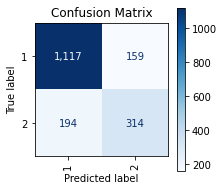

,Metric,Score
0,Brier Score,0.130500
1,AUROC,0.877751


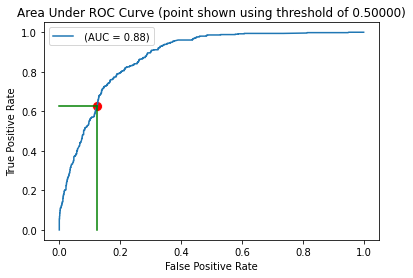

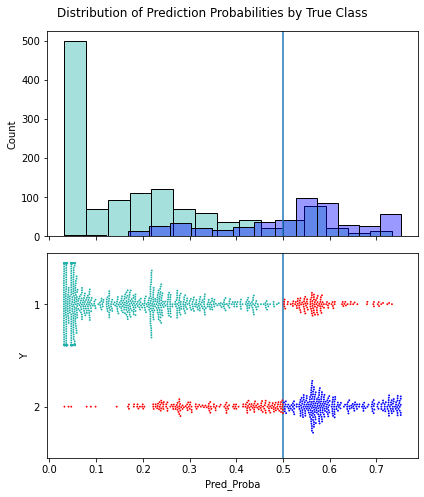

In [31]:
tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    default_class=None,
    thresholds=None
)  

,Start Range %,End Range %,Min Probability,Max Probability,Count 1,Count 2,Total Count,Precision,Recall,Cumulative Count 2,Cumulative Total Count,Cumulative Precision,Cumulative Recall
0,0.9,1.0,0.596275,0.752012,40,139,179,0.776536,0.273622,139,179,0.776536,0.273622
1,0.8,0.9,0.553971,0.595844,62,116,178,0.651685,0.228346,255,357,0.714286,0.501969
2,0.7,0.8,0.452833,0.553257,76,103,179,0.575419,0.202756,358,536,0.667910,0.704724
3,0.6,0.7,0.328304,0.452641,116,62,178,0.348315,0.122047,420,714,0.588235,0.826772
4,0.5,0.6,0.244073,0.327868,129,50,179,0.279330,0.098425,470,893,0.526316,0.925197
5,0.4,0.5,0.187904,0.243947,152,26,178,0.146067,0.051181,496,1071,0.463119,0.976378
6,0.3,0.4,0.089885,0.187153,171,7,178,0.039326,0.013780,503,1249,0.402722,0.990157
7,0.2,0.3,0.049770,0.089345,178,2,180,0.011111,0.003937,505,1429,0.353394,0.994094
8,0.1,0.2,0.036132,0.049715,149,2,151,0.013245,0.003937,507,1580,0.320886,0.998031
9,0.0,0.1,0.031040,0.036039,203,1,204,0.004902,0.001969,508,1784,0.284753,1.000000


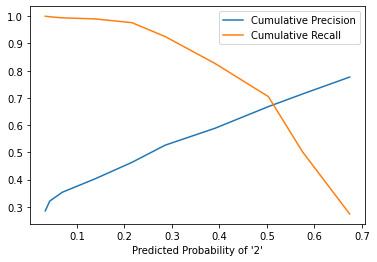

In [32]:
tuner.print_stats_table(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba
)

100%|████████████████████████████████████████████████████████████████████████████████████| 9/9 [00:05<00:00,  1.69it/s]


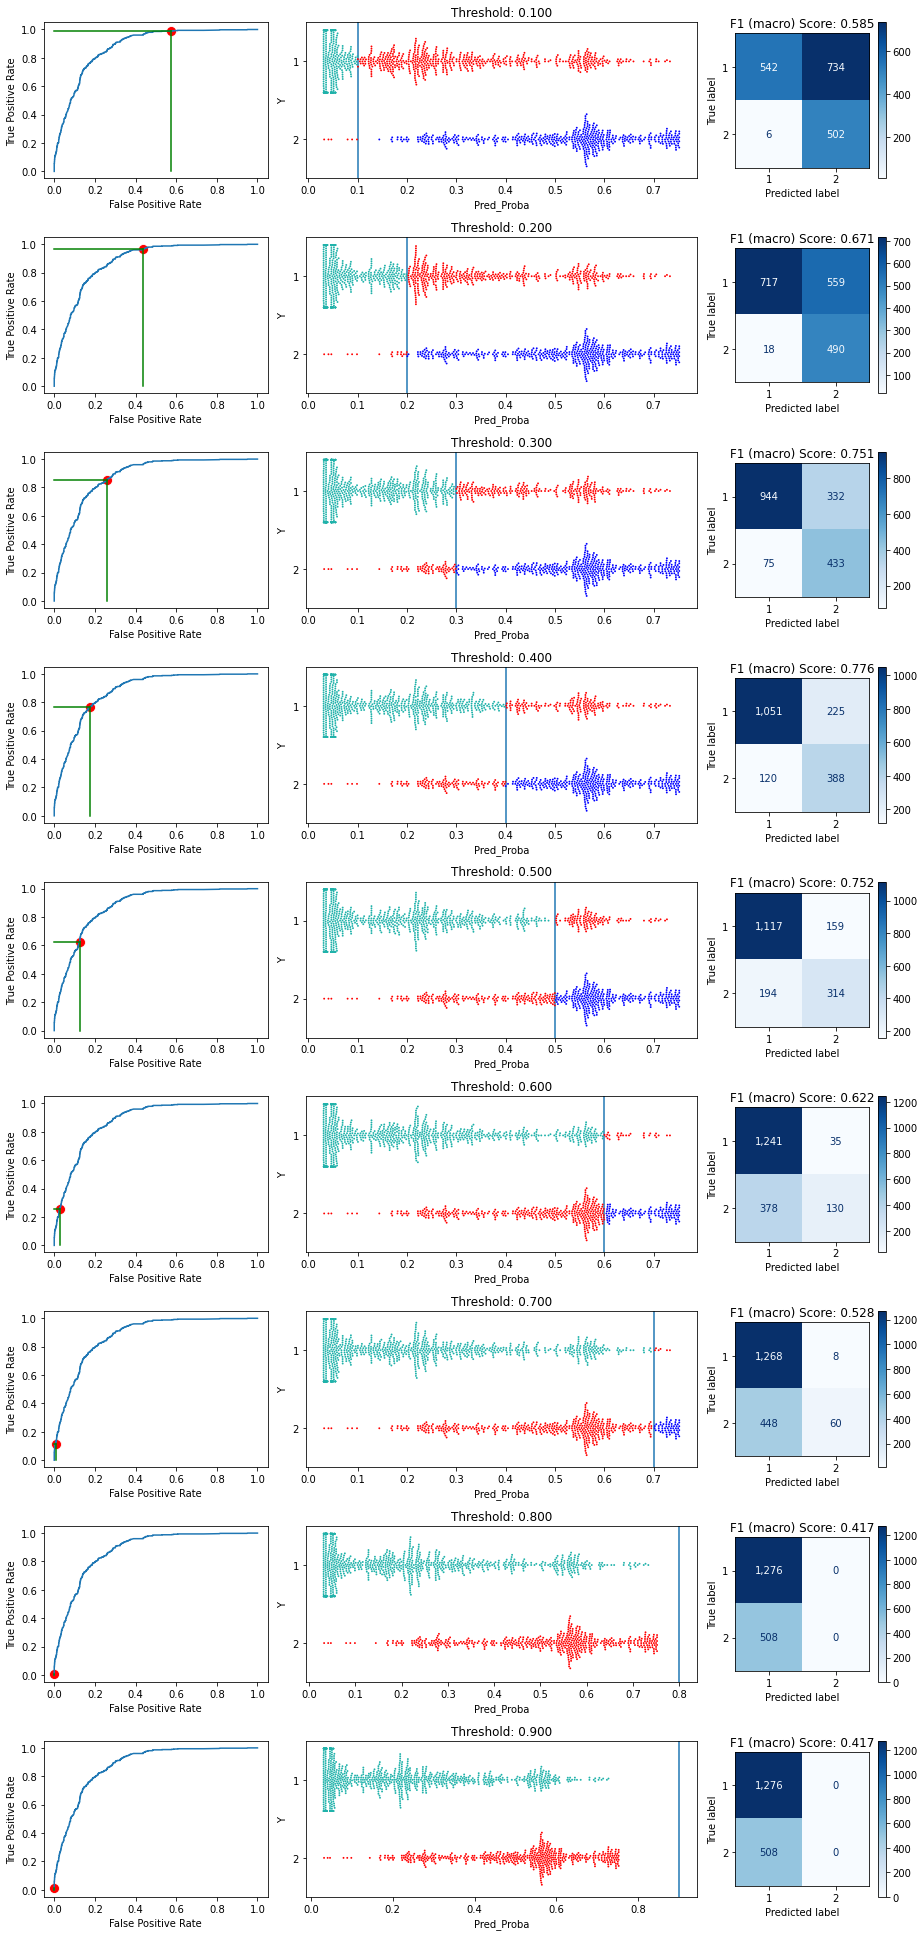

In [33]:
tuner.plot_by_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba)

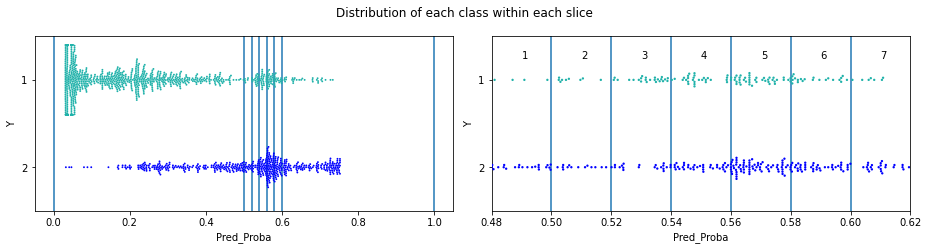

,Slice,Min Prob,Max Prob,1,2,Total,Fraction 1,Fraction 2
0,1,0.00,0.50,1117,194,1311,0.852021,0.147979
1,2,0.50,0.52,9,14,23,0.391304,0.608696
2,3,0.52,0.54,24,21,45,0.533333,0.466667
3,4,0.54,0.56,29,38,67,0.432836,0.567164
4,5,0.56,0.58,41,69,110,0.372727,0.627273
5,6,0.58,0.60,21,42,63,0.333333,0.666667
6,7,0.60,1.00,35,130,165,0.212121,0.787879


In [34]:
tuner.describe_slices(    
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    start=0.5, end=0.6, num_slices=5)

In [35]:
from sklearn.metrics import f1_score

best_threshold = tuner.tune_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    metric=f1_score,
    average='macro',
    higher_is_better=True,
    max_iterations=5
)
best_threshold

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:00<00:00, 15.11it/s]


0.4444500000000001

,Metric,1,2,Macro
0,Precision,0.883065,0.667279,0.775172
0,Recall,0.858150,0.714567,0.786359
0,F1,0.870429,0.690114,0.780272


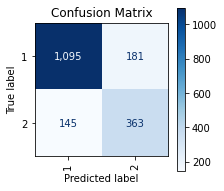

,Metric,Score
0,Brier Score,0.130500
1,AUROC,0.877751


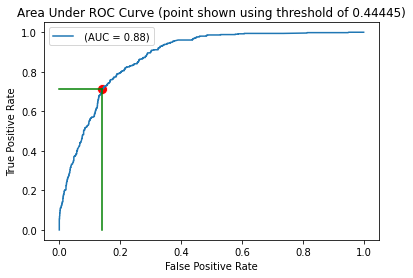

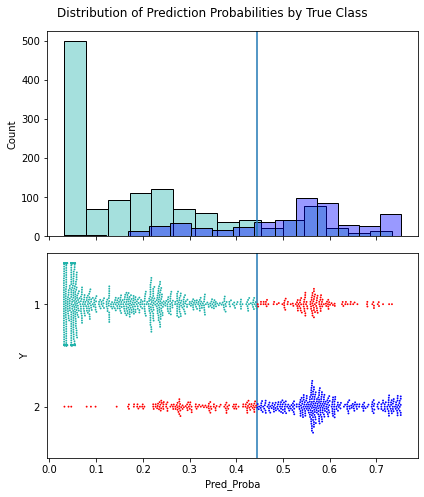

In [36]:
# The F1 macro score improved from about 0.75 to 0.78

tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba, 
    thresholds=best_threshold
)

# Digits dataset

In [37]:
# This is a multiclass dataset. It has no logical default class, though we use '0'
# here, which may be sensible in some scenarios. 

from sklearn.datasets import load_digits

np.random.seed(0)

data = load_digits()
df = pd.DataFrame(data.data)
df.columns = data.feature_names
y_true = data.target
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


In [38]:
target_classes = data.target_names
target_classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(df, y_true, test_size=0.33, random_state=42)

In [40]:
clf = RandomForestClassifier(max_depth=1, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)

In [42]:
tuner = ClassificationThresholdTuner()

,Metric,0,1,2,3,4,5,6,7,8,9,Macro
0,Precision,0.625000,0.542857,0.612903,0.481481,0.706667,1.000000,0.643678,0.802817,0.944444,0.846154,0.720600
0,Recall,1.000000,0.345455,0.730769,0.928571,0.828125,0.506849,0.982456,0.919355,0.326923,0.161765,0.673027
0,F1,0.769231,0.422222,0.666667,0.634146,0.762590,0.672727,0.777778,0.857143,0.485714,0.271605,0.631982


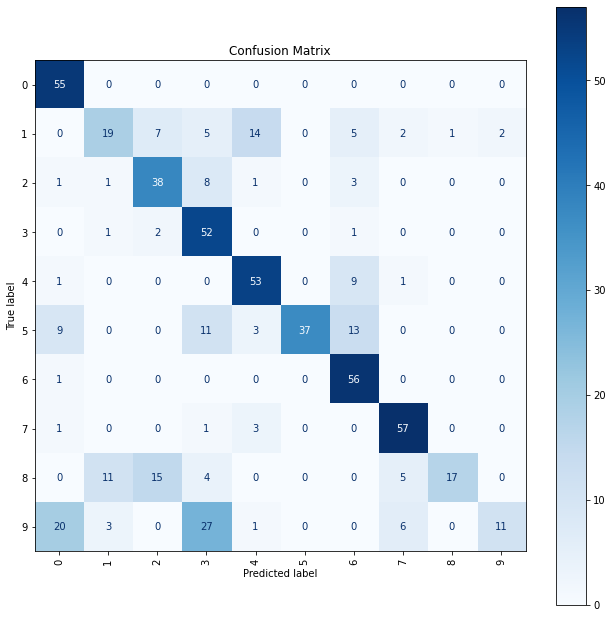

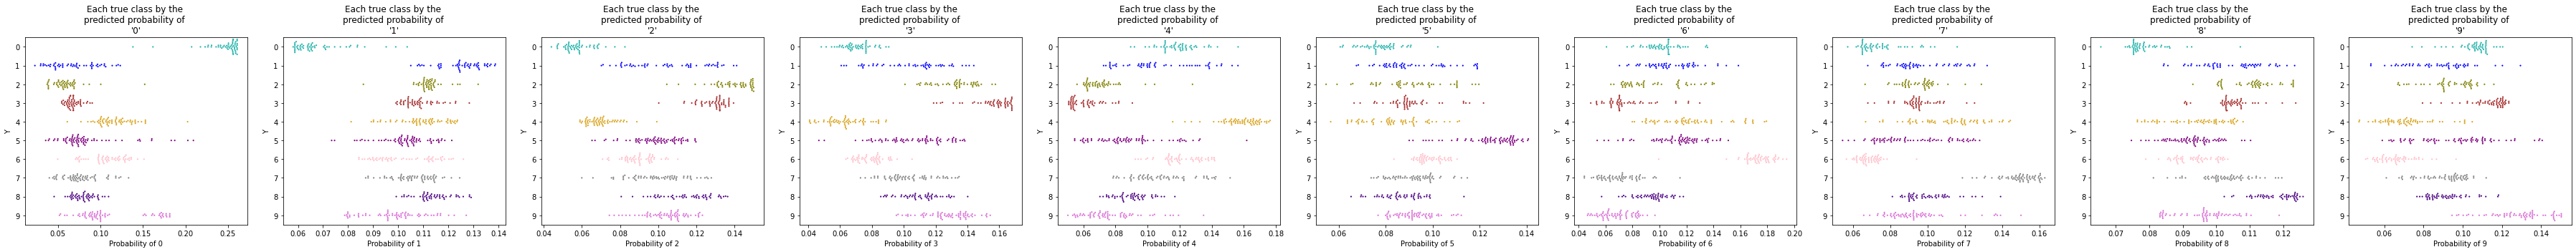

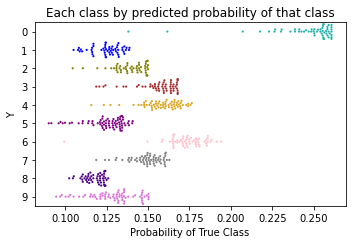

In [43]:
tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    default_class=None,
    thresholds=None
)   

In [44]:
from sklearn.metrics import f1_score

best_thresholds = tuner.tune_threshold(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    metric=f1_score,
    average='macro',
    default_class='0',
    max_iterations=5
)
best_thresholds

 20%|████████████████▊                                                                   | 1/5 [00:03<00:15,  3.96s/it]


[0.0, 0.02, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

,Metric,0,1,2,3,4,5,6,7,8,9,Macro
0,Precision,0.625000,0.542857,0.612903,0.481481,0.706667,1.000000,0.643678,0.802817,0.944444,0.846154,0.720600
0,Recall,1.000000,0.345455,0.730769,0.928571,0.828125,0.506849,0.982456,0.919355,0.326923,0.161765,0.673027
0,F1,0.769231,0.422222,0.666667,0.634146,0.762590,0.672727,0.777778,0.857143,0.485714,0.271605,0.631982


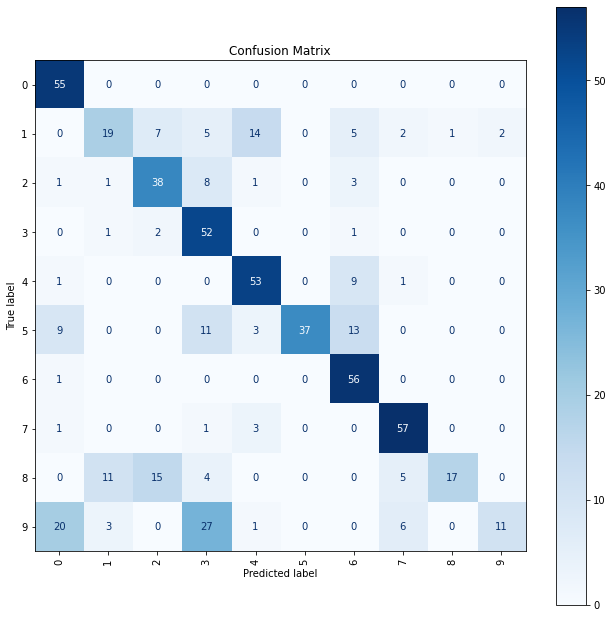

......................................................................................


## Examining the results in terms of class '0' (the default class) vs all

,Metric,Score
0,Brier Score,0.060594
1,AUROC,0.997909


Brier score and AUROC calculated based on predicting '0', vs not '0', so calculated as a two-class problem.

<br><br>Displaying the row of the confusion matrix for the current target (0). This shows which classes were predicted when 0 is true. This corresponds to the row for 0 in the swarm plot and explains the predictions for the red dots in this row. Red dots in other rows in the swarm plot may predict any class other than the correct class.

,0,1,2,3,4,5,6,7,8,9
0,55,0,0,0,0,0,0,0,0,0


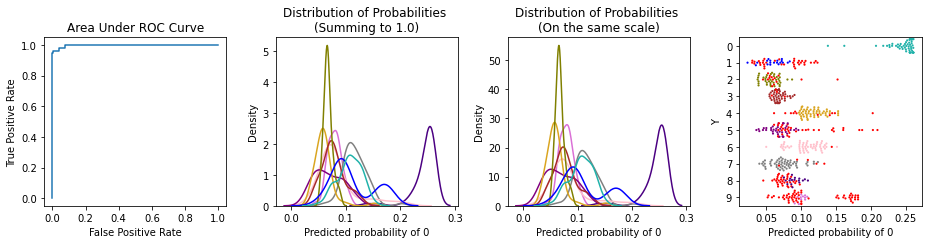

......................................................................................


## Examining the results in terms of class '1' vs all

,Metric,Score
0,Brier Score,0.080616
1,AUROC,0.926969


Brier score and AUROC calculated based on predicting '1', vs not '1', so calculated as a two-class problem.

<br><br>Displaying the row of the confusion matrix for the current target (1). This shows which classes were predicted when 1 is true. This corresponds to the row for 1 in the swarm plot and explains the predictions for the red dots in this row. Red dots in other rows in the swarm plot may predict any class other than the correct class.

,0,1,2,3,4,5,6,7,8,9
0,0,19,7,5,14,0,5,2,1,2


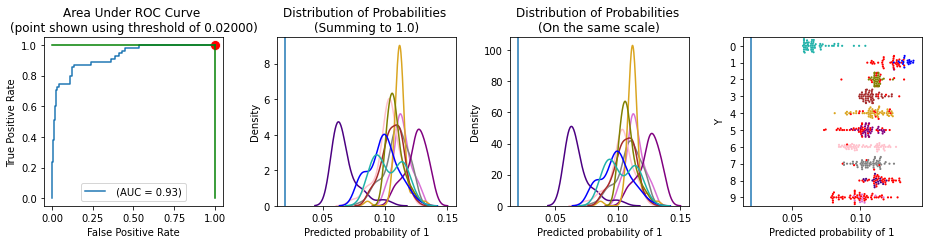

......................................................................................


## Examining the results in terms of class '2' vs all

,Metric,Score
0,Brier Score,0.073824
1,AUROC,0.965122


Brier score and AUROC calculated based on predicting '2', vs not '2', so calculated as a two-class problem.

<br><br>Displaying the row of the confusion matrix for the current target (2). This shows which classes were predicted when 2 is true. This corresponds to the row for 2 in the swarm plot and explains the predictions for the red dots in this row. Red dots in other rows in the swarm plot may predict any class other than the correct class.

,0,1,2,3,4,5,6,7,8,9
0,1,1,38,8,1,0,3,0,0,0


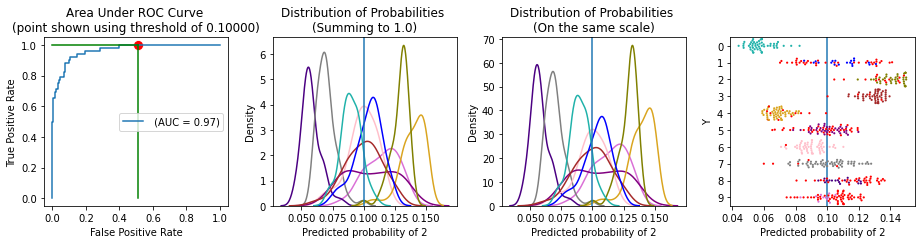

......................................................................................


## Examining the results in terms of class '3' vs all

,Metric,Score
0,Brier Score,0.076856
1,AUROC,0.973347


Brier score and AUROC calculated based on predicting '3', vs not '3', so calculated as a two-class problem.

<br><br>Displaying the row of the confusion matrix for the current target (3). This shows which classes were predicted when 3 is true. This corresponds to the row for 3 in the swarm plot and explains the predictions for the red dots in this row. Red dots in other rows in the swarm plot may predict any class other than the correct class.

,0,1,2,3,4,5,6,7,8,9
0,0,1,2,52,0,0,1,0,0,0


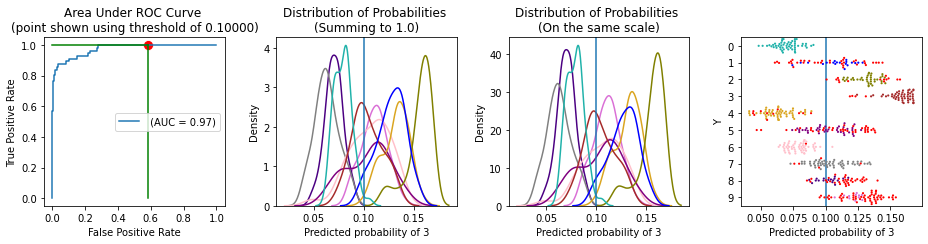

......................................................................................


## Examining the results in terms of class '4' vs all

,Metric,Score
0,Brier Score,0.084810
1,AUROC,0.987588


Brier score and AUROC calculated based on predicting '4', vs not '4', so calculated as a two-class problem.

<br><br>Displaying the row of the confusion matrix for the current target (4). This shows which classes were predicted when 4 is true. This corresponds to the row for 4 in the swarm plot and explains the predictions for the red dots in this row. Red dots in other rows in the swarm plot may predict any class other than the correct class.

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,53,0,9,1,0,0


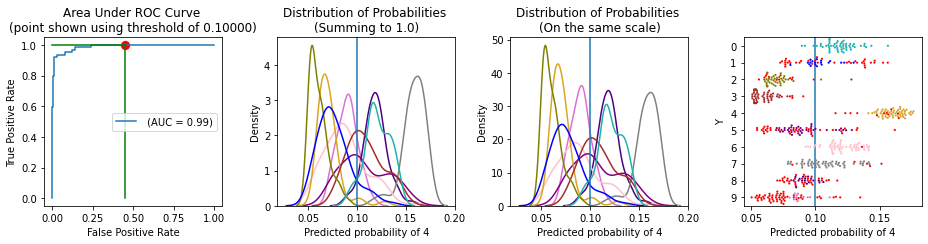

......................................................................................


## Examining the results in terms of class '5' vs all

,Metric,Score
0,Brier Score,0.101355
1,AUROC,0.969027


Brier score and AUROC calculated based on predicting '5', vs not '5', so calculated as a two-class problem.

<br><br>Displaying the row of the confusion matrix for the current target (5). This shows which classes were predicted when 5 is true. This corresponds to the row for 5 in the swarm plot and explains the predictions for the red dots in this row. Red dots in other rows in the swarm plot may predict any class other than the correct class.

,0,1,2,3,4,5,6,7,8,9
0,9,0,0,11,3,37,13,0,0,0


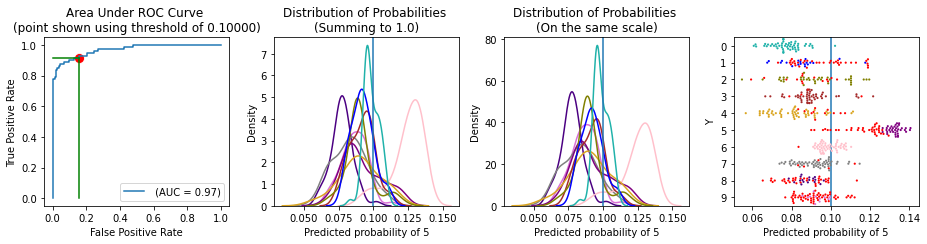

......................................................................................


## Examining the results in terms of class '6' vs all

,Metric,Score
0,Brier Score,0.074334
1,AUROC,0.987945


Brier score and AUROC calculated based on predicting '6', vs not '6', so calculated as a two-class problem.

<br><br>Displaying the row of the confusion matrix for the current target (6). This shows which classes were predicted when 6 is true. This corresponds to the row for 6 in the swarm plot and explains the predictions for the red dots in this row. Red dots in other rows in the swarm plot may predict any class other than the correct class.

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,0,0,0,56,0,0,0


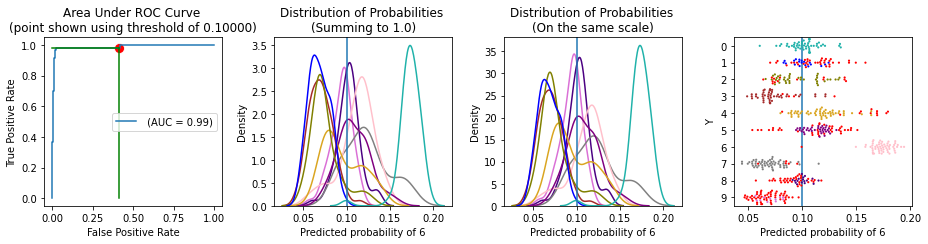

......................................................................................


## Examining the results in terms of class '7' vs all

,Metric,Score
0,Brier Score,0.083531
1,AUROC,0.993542


Brier score and AUROC calculated based on predicting '7', vs not '7', so calculated as a two-class problem.

<br><br>Displaying the row of the confusion matrix for the current target (7). This shows which classes were predicted when 7 is true. This corresponds to the row for 7 in the swarm plot and explains the predictions for the red dots in this row. Red dots in other rows in the swarm plot may predict any class other than the correct class.

,0,1,2,3,4,5,6,7,8,9
0,1,0,0,1,3,0,0,57,0,0


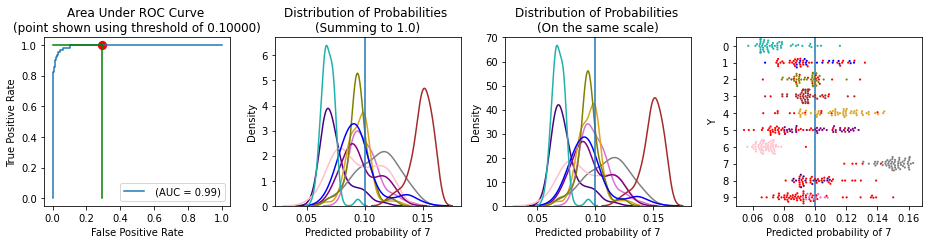

......................................................................................


## Examining the results in terms of class '8' vs all

,Metric,Score
0,Brier Score,0.076900
1,AUROC,0.950043


Brier score and AUROC calculated based on predicting '8', vs not '8', so calculated as a two-class problem.

<br><br>Displaying the row of the confusion matrix for the current target (8). This shows which classes were predicted when 8 is true. This corresponds to the row for 8 in the swarm plot and explains the predictions for the red dots in this row. Red dots in other rows in the swarm plot may predict any class other than the correct class.

,0,1,2,3,4,5,6,7,8,9
0,0,11,15,4,0,0,0,5,17,0


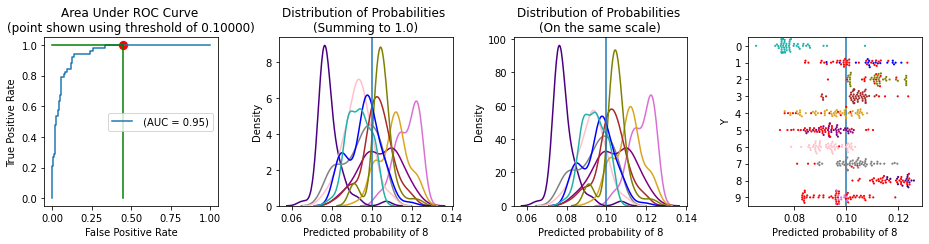

......................................................................................


## Examining the results in terms of class '9' vs all

,Metric,Score
0,Brier Score,0.094489
1,AUROC,0.943693


Brier score and AUROC calculated based on predicting '9', vs not '9', so calculated as a two-class problem.

<br><br>Displaying the row of the confusion matrix for the current target (9). This shows which classes were predicted when 9 is true. This corresponds to the row for 9 in the swarm plot and explains the predictions for the red dots in this row. Red dots in other rows in the swarm plot may predict any class other than the correct class.

,0,1,2,3,4,5,6,7,8,9
0,20,3,0,27,1,0,0,6,0,11


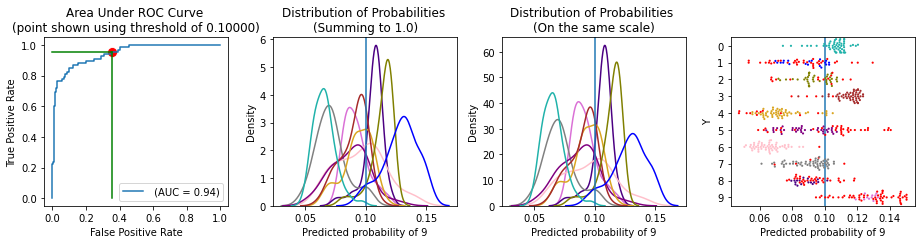

In [45]:
tuner.print_stats_proba(
    y_true=y_test, 
    target_classes=target_classes,
    y_pred_proba=y_pred_proba,
    default_class='0',
    thresholds=best_thresholds
) 